# Introduction
**Main goal:** EDA - Important Feature Extractation for Fraud Detection Model Training
- Load Data
- Data Overview
- EDA - Explore Data Analyze


In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lấy đường dẫn thư mục hiện tại
current_dir = os.getcwd()

# Tạo đường dẫn đầy đủ đến file CSV
file_path = os.path.join(current_dir, "..", "data", "Fraud Detection Dataset.csv")

df = pd.read_csv(file_path)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


# EDA - Explore Data Anaalyst


In [3]:
print(f'Data shape: {df.shape} \n')
print(f'Data Types: {df.dtypes}\n')
for col in df.columns:
    print(f'Unique Data of The {col}:', df[col].unique())

Data shape: (51000, 12) 

Data Types: Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

Unique Data of The Transaction_ID: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Unique Data of The User_ID: [4174 4507 1860 ... 4616 2261 4210]
Unique Data of The Transaction_Amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Unique Data of The Transaction_Type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique Data of The Time_of_Transaction: [16. 13. nan 15. 19

**Main Goal**: Fully explore the data and find every important feature which might effect to model accuracy
- Firstly, let's handle missing vallue
- Secondly, explore categorical - numerical data

In [4]:
print(f'Nan Type Values in each columns:\n', df.isnull().sum())

Nan Type Values in each columns:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


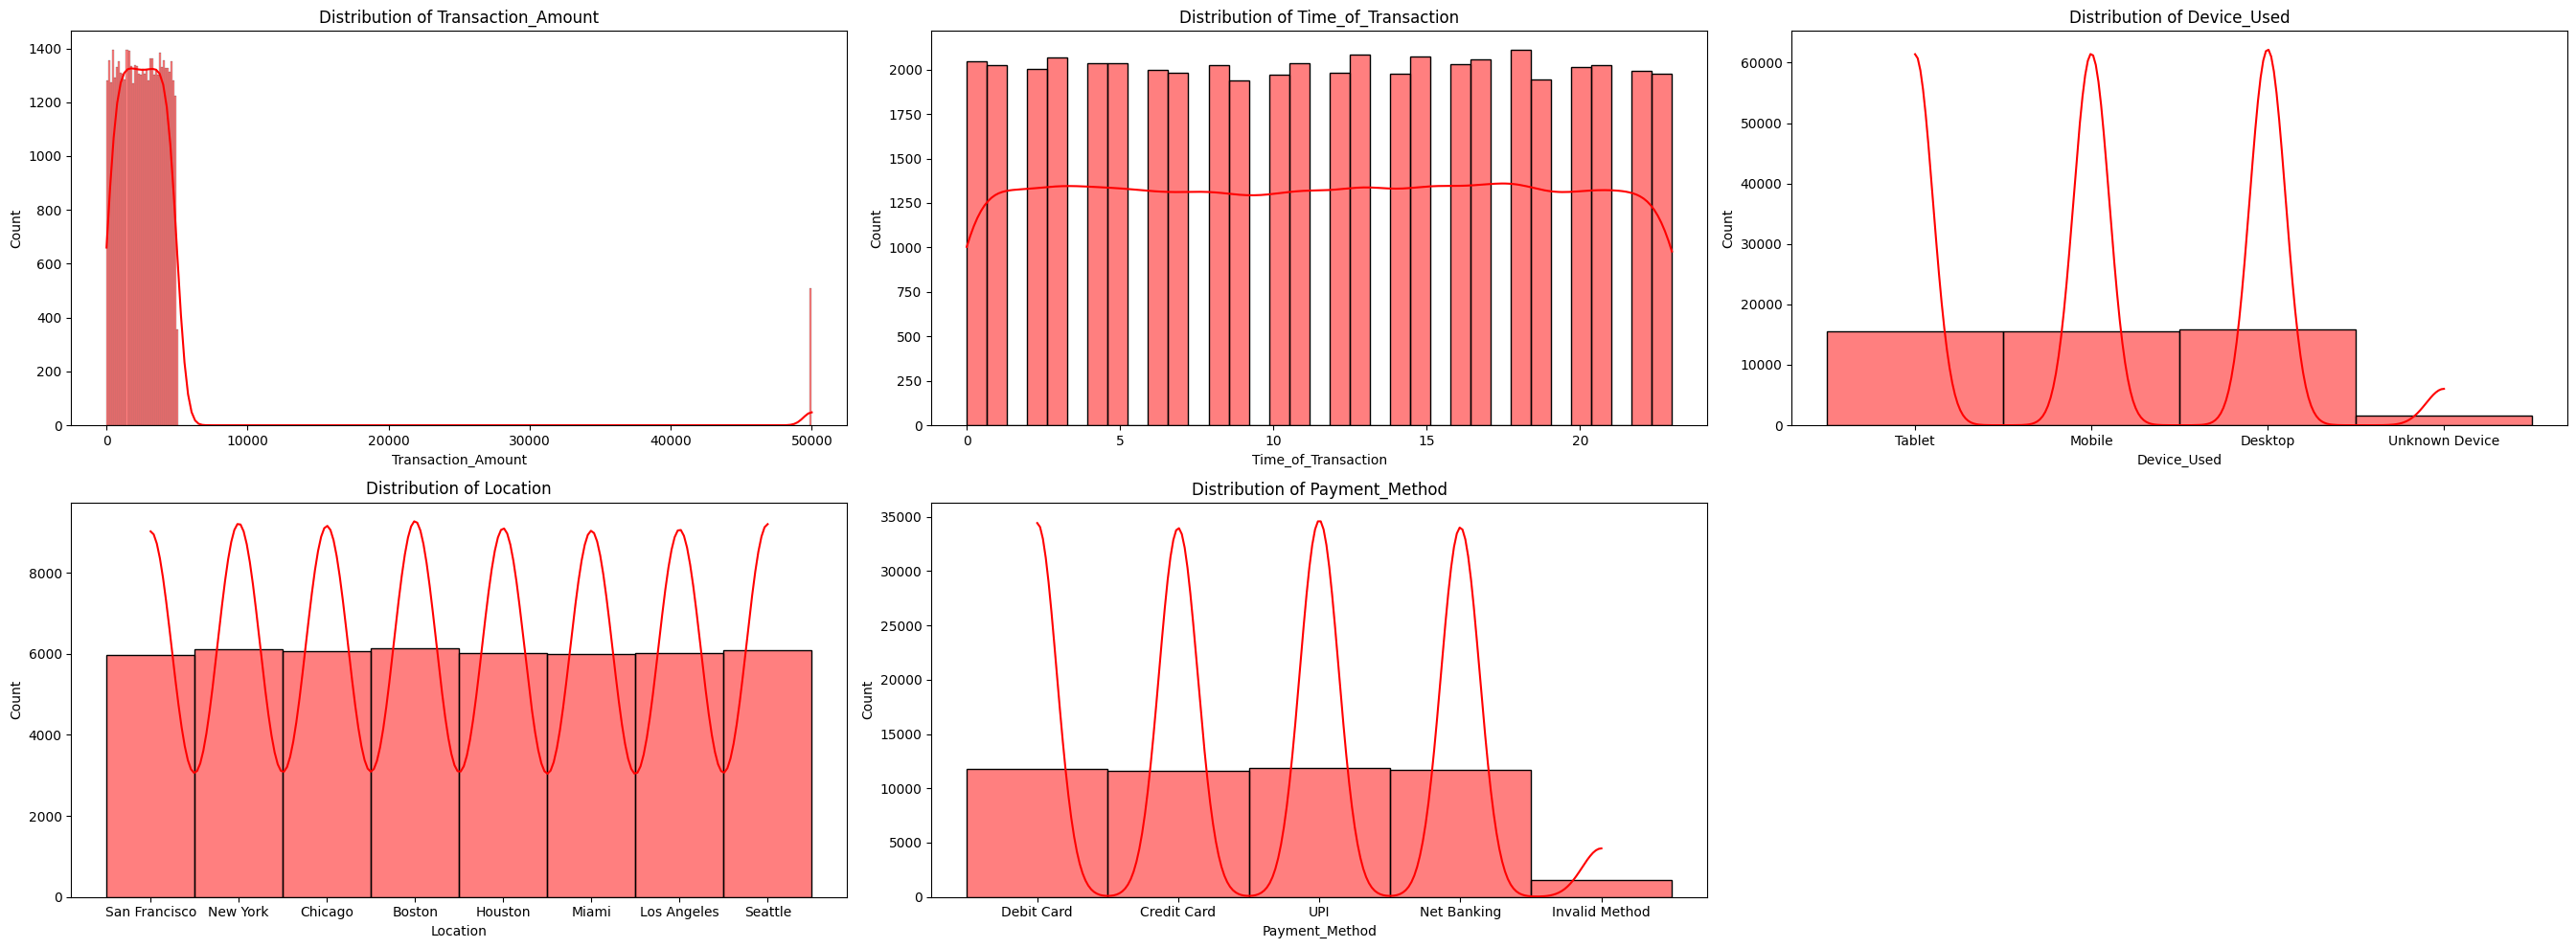

In [5]:
# Lấy danh sách các cột có giá trị thiếu
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

if missing_cols:  # Kiểm tra có cột nào thiếu không
    num_cols = 3  # Số biểu đồ tối đa mỗi hàng
    num_rows = (len(missing_cols) + num_cols - 1) // num_cols  # Tính số hàng cần thiết

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9 * num_cols, 5 * num_rows))
    
    # Chuyển `axes` thành mảng 2D nếu có nhiều hàng, hoặc mảng 1D nếu chỉ có 1 hàng
    axes = np.array(axes).reshape(num_rows, num_cols)

    # Duyệt qua từng cột có giá trị thiếu để vẽ biểu đồ
    for ax, col in zip(axes.flatten(), missing_cols):
        sns.histplot(df[col], kde=True, ax=ax, color='red')
        ax.set_title(f"Distribution of {col}")

    # Ẩn các ô dư thừa nếu số lượng biểu đồ không lấp đầy toàn bộ grid
    for i in range(len(missing_cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
else:
    print("Không có cột nào chứa giá trị thiếu!")


In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [8]:
# Lấy danh sách các cột có giá trị thiếu
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

if missing_cols:  # Kiểm tra có cột nào thiếu không
    num_cols = 3  # Số biểu đồ tối đa mỗi hàng
    num_rows = (len(missing_cols) + num_cols - 1) // num_cols  # Tính số hàng cần thiết

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9 * num_cols, 5 * num_rows))
    
    # Chuyển `axes` thành mảng 2D nếu có nhiều hàng, hoặc mảng 1D nếu chỉ có 1 hàng
    axes = np.array(axes).reshape(num_rows, num_cols)

    # Duyệt qua từng cột có giá trị thiếu để vẽ biểu đồ
    for ax, col in zip(axes.flatten(), missing_cols):
        sns.histplot(df[col], kde=True, ax=ax, color='red')
        ax.set_title(f"Distribution of {col}")

    # Ẩn các ô dư thừa nếu số lượng biểu đồ không lấp đầy toàn bộ grid
    for i in range(len(missing_cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()
else:
    print("Không có cột nào chứa giá trị thiếu!")


Không có cột nào chứa giá trị thiếu!


Review **Transaction_ID** and **User_ID**, because their importance in the modelling is questionable

In [9]:
print("Unique Data of Transaction_ID: ", len(df['Transaction_ID'].unique()))
print("Unique Data of User_ID: ", len(df['User_ID'].unique()))

Unique Data of Transaction_ID:  50000
Unique Data of User_ID:  4000


In [10]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Unknown,3,115,9,Unknown,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


# Data Preprocessing

In [11]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_eda = df.drop(columns = 'Transaction_ID').copy()
df_train = df.copy()

categorical_features = ['Transaction_Type','Device_Used','Location','Payment_Method']

for col in categorical_features:
    df_eda[col] = le.fit_transform(df_eda[col])

df_train = pd.get_dummies(df_train, columns = categorical_features)

In [12]:
print('Train Dataset: ')
df_train.head()

Train Dataset: 


,Transaction_ID,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,...,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
0,T1,4174,1292.76,16.0000,0,119,13,0,True,False,...,False,True,False,False,False,True,False,False,False,False
1,T2,4507,1554.58,13.0000,4,79,3,0,True,False,...,True,False,False,False,True,False,False,False,False,False
2,T3,1860,2395.02,11.4884,3,115,9,0,True,False,...,False,False,False,True,False,False,False,False,False,True
3,T4,2294,100.10,15.0000,4,3,4,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,T5,2130,1490.50,19.0000,2,57,7,0,False,False,...,False,True,False,False,True,False,False,False,False,False


In [13]:
print('EDA Dataset:')
df_eda.head()

EDA Dataset:


,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,0,16.0000,2,6,0,119,13,1,0
1,4507,1554.58,0,13.0000,1,5,4,79,3,0,0
2,1860,2395.02,0,11.4884,1,8,3,115,9,5,0
3,2294,100.10,2,15.0000,0,1,4,3,4,4,0
4,2130,1490.50,4,19.0000,1,6,2,57,7,0,0


Difference between: Label Encoding (LabelEncoder().fit_transform()) and One-Hot Encoding (pd.get_dummies())

<Axes: >

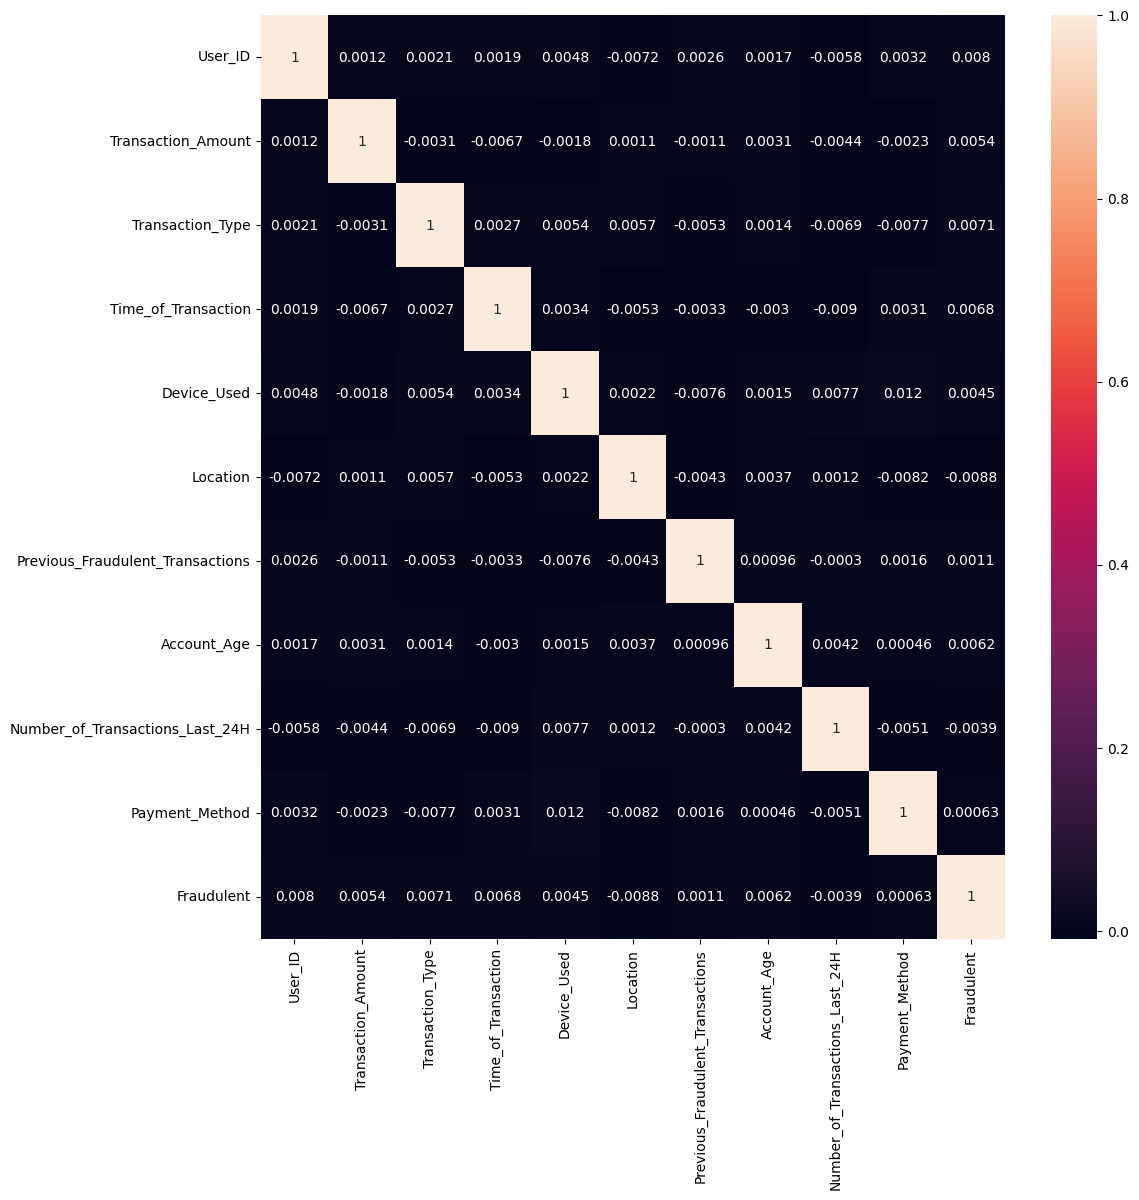

In [14]:
plt.figure(figsize=(12,12))

sns.heatmap(df_eda.corr(), annot=True)

Text(0.5, 1.0, 'Fraudulent Distribution')

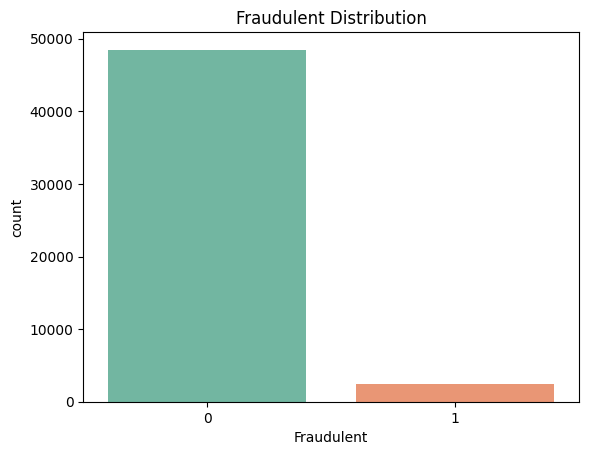

In [15]:
sns.countplot(x=df['Fraudulent'], data=df, palette='Set2')
plt.title('Fraudulent Distribution')

In [16]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df_eda.drop(['Fraudulent'], axis=1), df_eda['Fraudulent'])
print(mi_scores)    

[4.78607745e-04 0.00000000e+00 1.91979994e-03 5.66682470e-05
 1.04635144e-03 2.12030086e-03 1.97089693e-03 0.00000000e+00
 6.96289656e-04 3.56795487e-03]


** MI Scores of several columns are zero, which might suggest the that these features are irrelevant to target variable

In [17]:
important_features = df_eda.drop(['Fraudulent'], axis=1).columns[mi_scores > 0]
important_features

Index(['User_ID', 'Transaction_Type', 'Time_of_Transaction', 'Device_Used',
       'Location', 'Previous_Fraudulent_Transactions',
       'Number_of_Transactions_Last_24H', 'Payment_Method'],
      dtype='object')

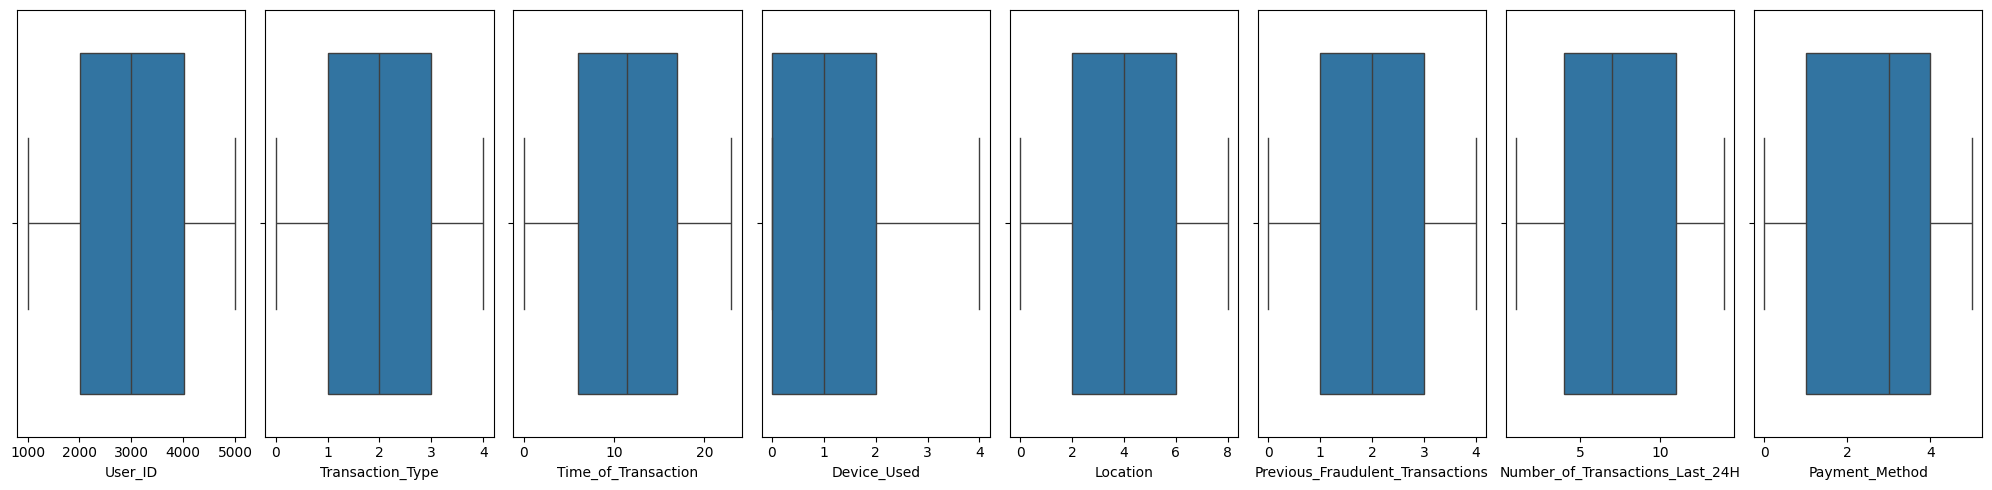

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=len(important_features), figsize=(20, 5))

for ax, col in zip(axes, important_features):
    sns.boxplot(x=df_eda[col], ax=ax)

plt.tight_layout()
plt.show()

**There arent significant outliers in this important columns**

**The conclusion which we made from the Exploratory Data Analysis is that the dataset has unbalanced labels for target variable. Problem can be handled by several methods:**
- Oversampling Minority Class with SMOTE (Best for Small Datasets)
- Undersampling Majority Class (Risky but Fast)
- Adjusting Class Weights (Best for Large Datasets)
- Anomaly Detection (Used for Fraud/Failure Detection)


# Modelling with Classic Machine Learning Algorithms

In [19]:
df_train = df.drop(columns = ['Transaction_ID'])
categorical_features = ['Transaction_Type','Device_Used','Location','Payment_Method']
df_train = pd.get_dummies(df_train, columns = categorical_features)
df_train.shape, df_eda.shape

((51000, 32), (51000, 11))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
import tqdm
# The imblearn library is already imported in the cell, no need to install it here.
# If you still need to install it, you can use the following command in a separate cell or terminal:
# !pip install imbalanced-learn

In [21]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [22]:
scaler = StandardScaler()

X = df_train.drop(['Fraudulent'], axis=1)
Y = df_train['Fraudulent']

Training Models:   0%|          | 0/8 [00:00<?, ?it/s]

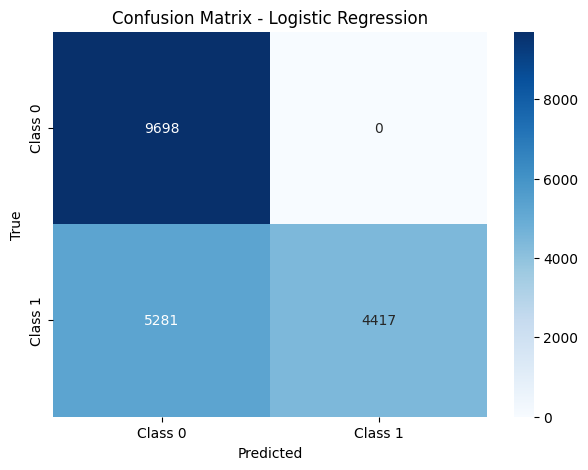

Training Models:  12%|█▎        | 1/8 [00:01<00:12,  1.73s/it]

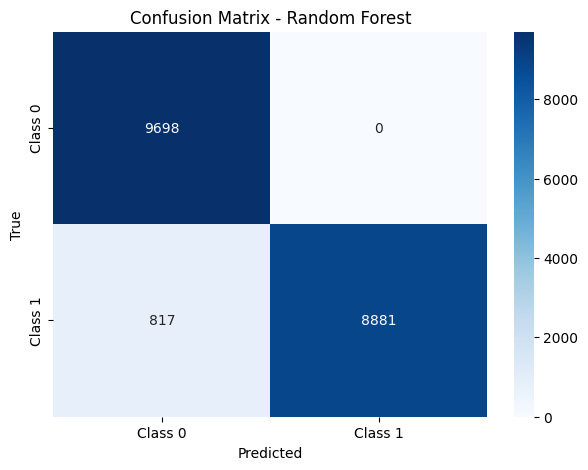

Training Models:  25%|██▌       | 2/8 [00:55<03:12, 32.12s/it]

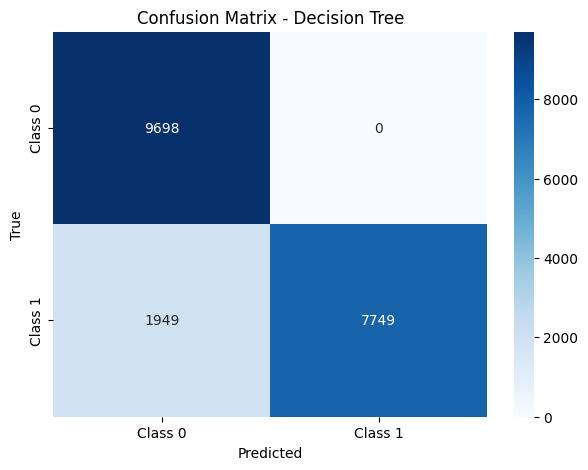

Training Models:  38%|███▊      | 3/8 [00:56<01:30, 18.03s/it]

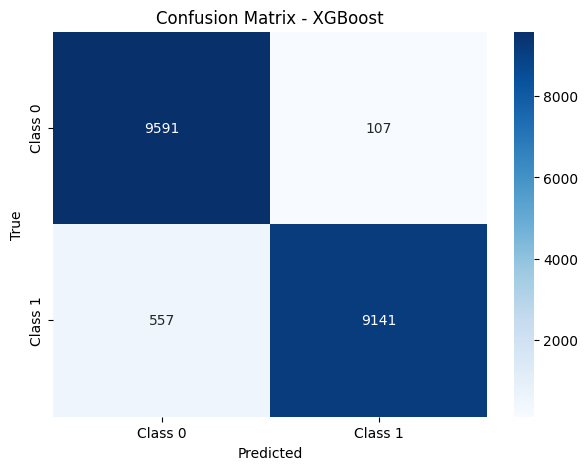

Training Models:  50%|█████     | 4/8 [01:04<00:56, 14.12s/it]

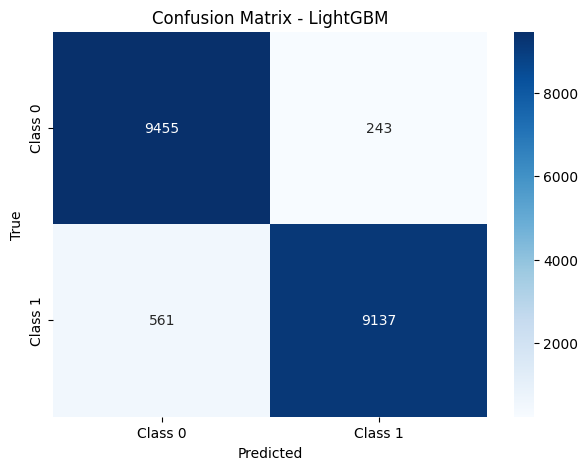

Training Models:  62%|██████▎   | 5/8 [01:11<00:34, 11.65s/it]

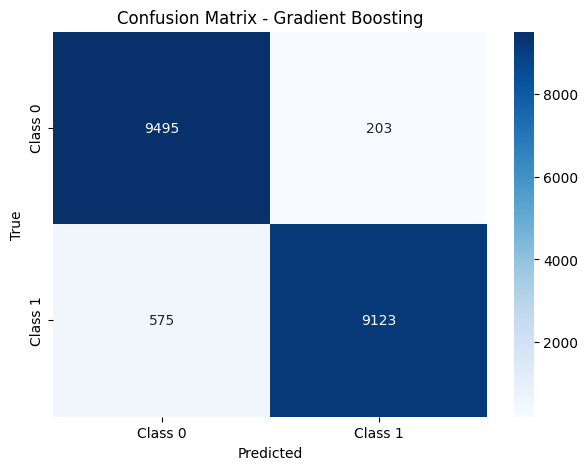

Training Models:  75%|███████▌  | 6/8 [07:32<04:34, 137.24s/it]

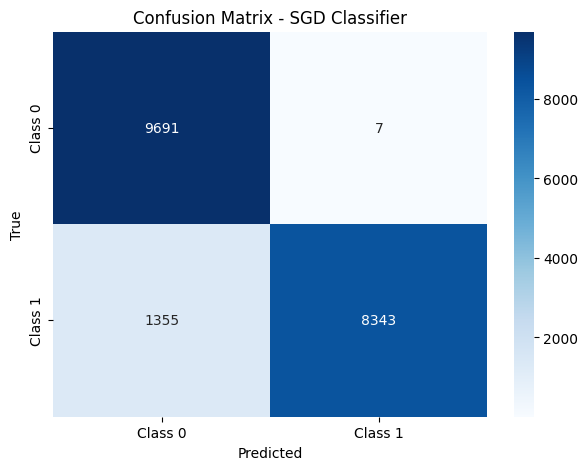

Training Models:  88%|████████▊ | 7/8 [07:40<01:34, 94.92s/it] 

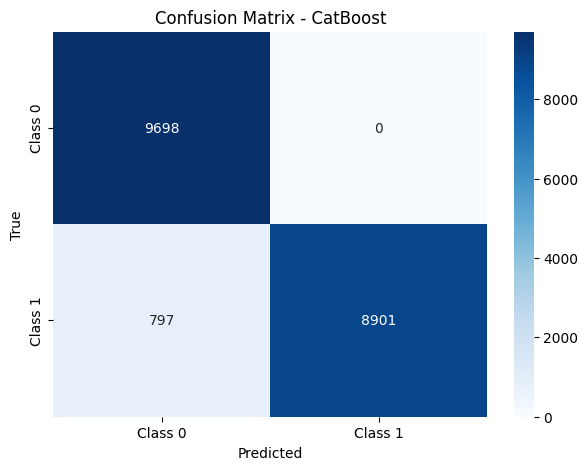

Training Models: 100%|██████████| 8/8 [07:59<00:00, 59.99s/it]

                 Model  Accuracy  F1 Score   ROC AUC
3              XGBoost  0.965766  0.965748  0.965766
5    Gradient Boosting  0.959889  0.959874  0.959889
7             CatBoost  0.958909  0.958840  0.958909
4             LightGBM  0.958548  0.958537  0.958548
1        Random Forest  0.957878  0.957803  0.957878
6       SGD Classifier  0.929779  0.929439  0.929779
2        Decision Tree  0.899515  0.898490  0.899515
0  Logistic Regression  0.727727  0.705927  0.727727


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from tqdm import tqdm

scaler = StandardScaler()

X = df_train.drop(['Fraudulent'], axis=1)
Y = df_train['Fraudulent']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, Y)
X_scaled = scaler.fit_transform(X_train_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver="liblinear", max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, class_weight="balanced_subsample", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, criterion="gini", class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, scale_pos_weight=5, subsample=0.8, colsample_bytree=0.8, eval_metric="logloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, num_leaves=60, min_data_in_leaf=5, force_col_wise=True, scale_pos_weight=5, verbose=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, min_samples_split=5),
    "SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, max_iter=2000, tol=1e-4, class_weight="balanced"),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.03, depth=7, l2_leaf_reg=5, scale_pos_weight=5, verbose=0),
}

results = []
for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1, "ROC AUC": roc_auc})

    plot_confusion_matrix(y_test, y_pred, name)

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

In [25]:
results_df

,Model,Accuracy,F1 Score,ROC AUC
3,XGBoost,0.965766,0.965748,0.965766
5,Gradient Boosting,0.959889,0.959874,0.959889
7,CatBoost,0.958909,0.958840,0.958909
4,LightGBM,0.958548,0.958537,0.958548
1,Random Forest,0.957878,0.957803,0.957878
6,SGD Classifier,0.929779,0.929439,0.929779
2,Decision Tree,0.899515,0.898490,0.899515
0,Logistic Regression,0.727727,0.705927,0.727727


Since the imbalance continues, lets try using isolation forest, which is best way to handle imbalanced data 
**IMPORTANT:** isolation forest should be used on standard data, not on SMOTE data

# Isolation Forest

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [28]:
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

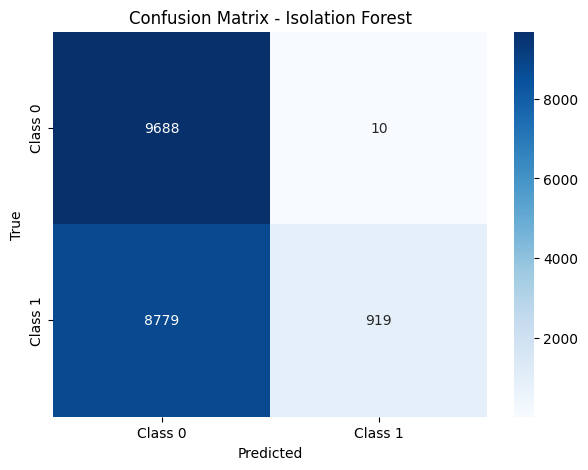

In [29]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()